<h2><a href="https://leetcode.com/problems/minimize-hamming-distance-after-swap-operations">1722. Minimize Hamming Distance After Swap Operations</a></h2><h3>Medium</h3><hr><p>You are given two integer arrays, <code>source</code> and <code>target</code>, both of length <code>n</code>. You are also given an array <code>allowedSwaps</code> where each <code>allowedSwaps[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that you are allowed to swap the elements at index <code>a<sub>i</sub></code> and index <code>b<sub>i</sub></code> <strong>(0-indexed)</strong> of array <code>source</code>. Note that you can swap elements at a specific pair of indices <strong>multiple</strong> times and in <strong>any</strong> order.</p>

<p>The <strong>Hamming distance</strong> of two arrays of the same length, <code>source</code> and <code>target</code>, is the number of positions where the elements are different. Formally, it is the number of indices <code>i</code> for <code>0 &lt;= i &lt;= n-1</code> where <code>source[i] != target[i]</code> <strong>(0-indexed)</strong>.</p>

<p>Return <em>the <strong>minimum Hamming distance</strong> of </em><code>source</code><em> and </em><code>target</code><em> after performing <strong>any</strong> amount of swap operations on array </em><code>source</code><em>.</em></p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> source = [1,2,3,4], target = [2,1,4,5], allowedSwaps = [[0,1],[2,3]]
<strong>Output:</strong> 1
<strong>Explanation:</strong> source can be transformed the following way:
- Swap indices 0 and 1: source = [<u>2</u>,<u>1</u>,3,4]
- Swap indices 2 and 3: source = [2,1,<u>4</u>,<u>3</u>]
The Hamming distance of source and target is 1 as they differ in 1 position: index 3.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> source = [1,2,3,4], target = [1,3,2,4], allowedSwaps = []
<strong>Output:</strong> 2
<strong>Explanation:</strong> There are no allowed swaps.
The Hamming distance of source and target is 2 as they differ in 2 positions: index 1 and index 2.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> source = [5,1,2,4,3], target = [1,5,4,2,3], allowedSwaps = [[0,4],[4,2],[1,3],[1,4]]
<strong>Output:</strong> 0
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == source.length == target.length</code></li>
	<li><code>1 &lt;= n &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= source[i], target[i] &lt;= 10<sup>5</sup></code></li>
	<li><code>0 &lt;= allowedSwaps.length &lt;= 10<sup>5</sup></code></li>
	<li><code>allowedSwaps[i].length == 2</code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub> &lt;= n - 1</code></li>
	<li><code>a<sub>i</sub> != b<sub>i</sub></code></li>
</ul>


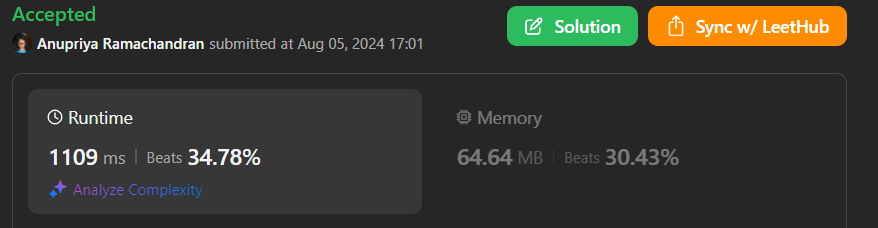

In [3]:
from collections import defaultdict, Counter
from typing import List

class Solution:
    def minimumHammingDistance(self, source: List[int], target: List[int], allowedSwaps: List[List[int]]) -> int:
        uf = {}
        n = len(source)
        def find(node):
            if node not in uf:
                uf[node] = node
            if uf[node] != node:
                uf[node] = find(uf[node])
            return uf[node]

        def union(x, y):
            root_x = find(x)
            root_y = find(y)
            uf[root_x] = root_y

        for x, y in allowedSwaps:
            union(x, y)
    
        disjoint_set_counter = defaultdict(Counter)
        for i in range(n):
            disjoint_set_counter[find(i)][source[i]] += 1

        res = 0
        for i in range(n):
            if disjoint_set_counter[find(i)][target[i]] > 0:
                disjoint_set_counter[find(i)][target[i]] -= 1
            else:
                res += 1

        return res

In [6]:
source = [1,2,3,4]
target = [2,1,4,5]
allowedSwaps = [[0,1],[2,3]]
sol = Solution()
sol.minimumHammingDistance(source, target, allowedSwaps)

1

In [8]:
source = [5,1,2,4,3]
target = [1,5,4,2,3]
allowedSwaps = [[0,4],[4,2],[1,3],[1,4]]
sol = Solution()
sol.minimumHammingDistance(source, target, allowedSwaps)

0

In [ ]:
source = [1, 2, 3, 4, 5, 6]
target = [1,5,4,2,3, 6]
allowedSwaps = [[0,1],[4,2],[1,4]]
sol = Solution()
sol.minimumHammingDistance(source, target, allowedSwaps)